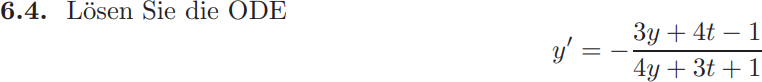

In [2]:
import numpy as np
import sympy as sp

In [71]:
a = 3
b = 4
c = -1

alpha = 4
beta = 3
gamma = 1

A = np.array([[a, b], [alpha, beta]])

y_0, t_0 = np.linalg.solve(A, -np.array([c, gamma]))

print("y_0 =", y_0)
print("t_0 =", t_0)

y_0 = -1.0
t_0 = 1.0


In [72]:
t = sp.Symbol('t')
y_hat = sp.Function('\widehat{y}')(t)

f = lambda x: -x

In [74]:
# a, b = sp.symbols('a b')
# alpha, beta = sp.symbols('alpha, beta')

expr = ((a * beta - b * alpha) * f(y_hat) + (b * alpha - a * beta) * (b - y_hat * beta) / (y_hat * alpha - a)) * (alpha * (b - y_hat * beta) / (y_hat * alpha - a) + beta)**(-2) * 1/t
expr = sp.simplify(expr)
display(expr)

2*(8*\widehat{y}(t)**3 - 18*\widehat{y}(t)**2 + 17*\widehat{y}(t) - 6)/(7*t)

In [44]:
C = sp.Symbol('C')

eq = (9 - 24 * y_hat + 16 * y_hat**2) - (2 * y_hat**2 - 3 * y_hat + 2) * t**2 * sp.exp(14 * C)

solutions = sp.solve(eq, y_hat)

display(solutions[0])
display(solutions[1])

(3*t**2*exp(14*C) - sqrt(7)*t*sqrt((-t**2*exp(14*C) + 8)*exp(14*C)) - 24)/(4*(t**2*exp(14*C) - 8))

(3*t**2*exp(14*C) + sqrt(7)*t*sqrt((-t**2*exp(14*C) + 8)*exp(14*C)) - 24)/(4*(t**2*exp(14*C) - 8))

In [51]:
y = []

for n, solution in enumerate(solutions):

    y_tilde = (b - solution * beta) / (solution * alpha - a) * t
    y_new = y_tilde.subs(t, t - t_0) + y_0
    y_new = sp.simplify(y_new)

    y += [y_new]

    print('solution', n+1, '...')
    display(y_new)

solution 1 ...


(sqrt(-((t - 1.0)**2*exp(14*C) - 8)*exp(14*C))*(-28.0*(t - 1.0)**2*exp(14*C) + 224.0) - sqrt(7)*((t - 1.0)**2*exp(14*C) - 8)*(sqrt(7)*sqrt(-((t - 1.0)**2*exp(14*C) - 8)*exp(14*C))*(3*t - 3.0) + 7*(t - 1.0)**2*exp(14*C) - 56))/(28*sqrt(-((t - 1.0)**2*exp(14*C) - 8)*exp(14*C))*((t - 1.0)**2*exp(14*C) - 8))

solution 2 ...


(sqrt(-((t - 1.0)**2*exp(14*C) - 8)*exp(14*C))*(-28.0*(t - 1.0)**2*exp(14*C) + 224.0) + sqrt(7)*((t - 1.0)**2*exp(14*C) - 8)*(sqrt(7)*sqrt(-((t - 1.0)**2*exp(14*C) - 8)*exp(14*C))*(3.0 - 3*t) + 7*(t - 1.0)**2*exp(14*C) - 56))/(28*sqrt(-((t - 1.0)**2*exp(14*C) - 8)*exp(14*C))*((t - 1.0)**2*exp(14*C) - 8))

In [68]:
for y_ in y:

    lhs = y_.diff(t)
    lhs = sp.simplify(lhs)
    rhs = - (3 * y_ + 4 * t - 1) / (t * y_ + 3 * t - 1)
    rhs = sp.simplify(rhs)

    zero = lhs - rhs
    zero = sp.simplify(zero)
    display(zero)

(-588.0*sqrt(7)*t**3*exp(14*C) - 196.0*t**2*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) + 3136.0*sqrt(7)*t**2*exp(14*C) - 196.0*t*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) - 4116.0*sqrt(7)*t*exp(14*C) + 2352.0*sqrt(7)*t + 1568.0*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) + 1568.0*sqrt(7)*exp(14*C) - 9408.0*sqrt(7))/(392.0*sqrt(7)*t**3*exp(14*C) + 1176.0*t**2*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) - 784.0*sqrt(7)*t**2*exp(14*C) - 4312.0*t*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) + 392.0*sqrt(7)*t*exp(14*C) - 3136.0*sqrt(7)*t + 1568.0*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)))

(-588.0*sqrt(7)*t**3*exp(14*C) + 196.0*t**2*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) + 3136.0*sqrt(7)*t**2*exp(14*C) + 196.0*t*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) - 4116.0*sqrt(7)*t*exp(14*C) + 2352.0*sqrt(7)*t - 1568.0*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) + 1568.0*sqrt(7)*exp(14*C) - 9408.0*sqrt(7))/(392.0*sqrt(7)*t**3*exp(14*C) - 1176.0*t**2*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) - 784.0*sqrt(7)*t**2*exp(14*C) + 4312.0*t*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)) + 392.0*sqrt(7)*t*exp(14*C) - 3136.0*sqrt(7)*t - 1568.0*sqrt((-t**2*exp(14*C) + 2.0*t*exp(14*C) - 1.0*exp(14*C) + 8)*exp(14*C)))